In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
caminho_do_arquivo = '/Users/natomanzolli/Documents/PhD/Artigos/Journals/Electric bus battery performance - Exploring ageing mechanisms using a cycle semi-empirical degradation model/Data/PrecoMerc.xlsx'
df = pd.read_excel(caminho_do_arquivo)

In [4]:
# Convert the 'Data' column to datetime format
df['Data'] = pd.to_datetime(df['Data'])

# Extract year, month, and month name from the 'Data' column
df['YearMonth'] = df['Data'].dt.to_period('M')
df['MonthName'] = df['Data'].dt.strftime('%B')

# Divide 'Preço - PT [€/MWh]' by 1000
df['Preço - PT [€/MWh]'] /= 1000

# Calculate the monthly average and standard deviation for each hour
monthly_stats = df.groupby(['YearMonth', 'Hora', 'MonthName'])['Preço - PT [€/MWh]'].agg(['mean', 'std']).reset_index()



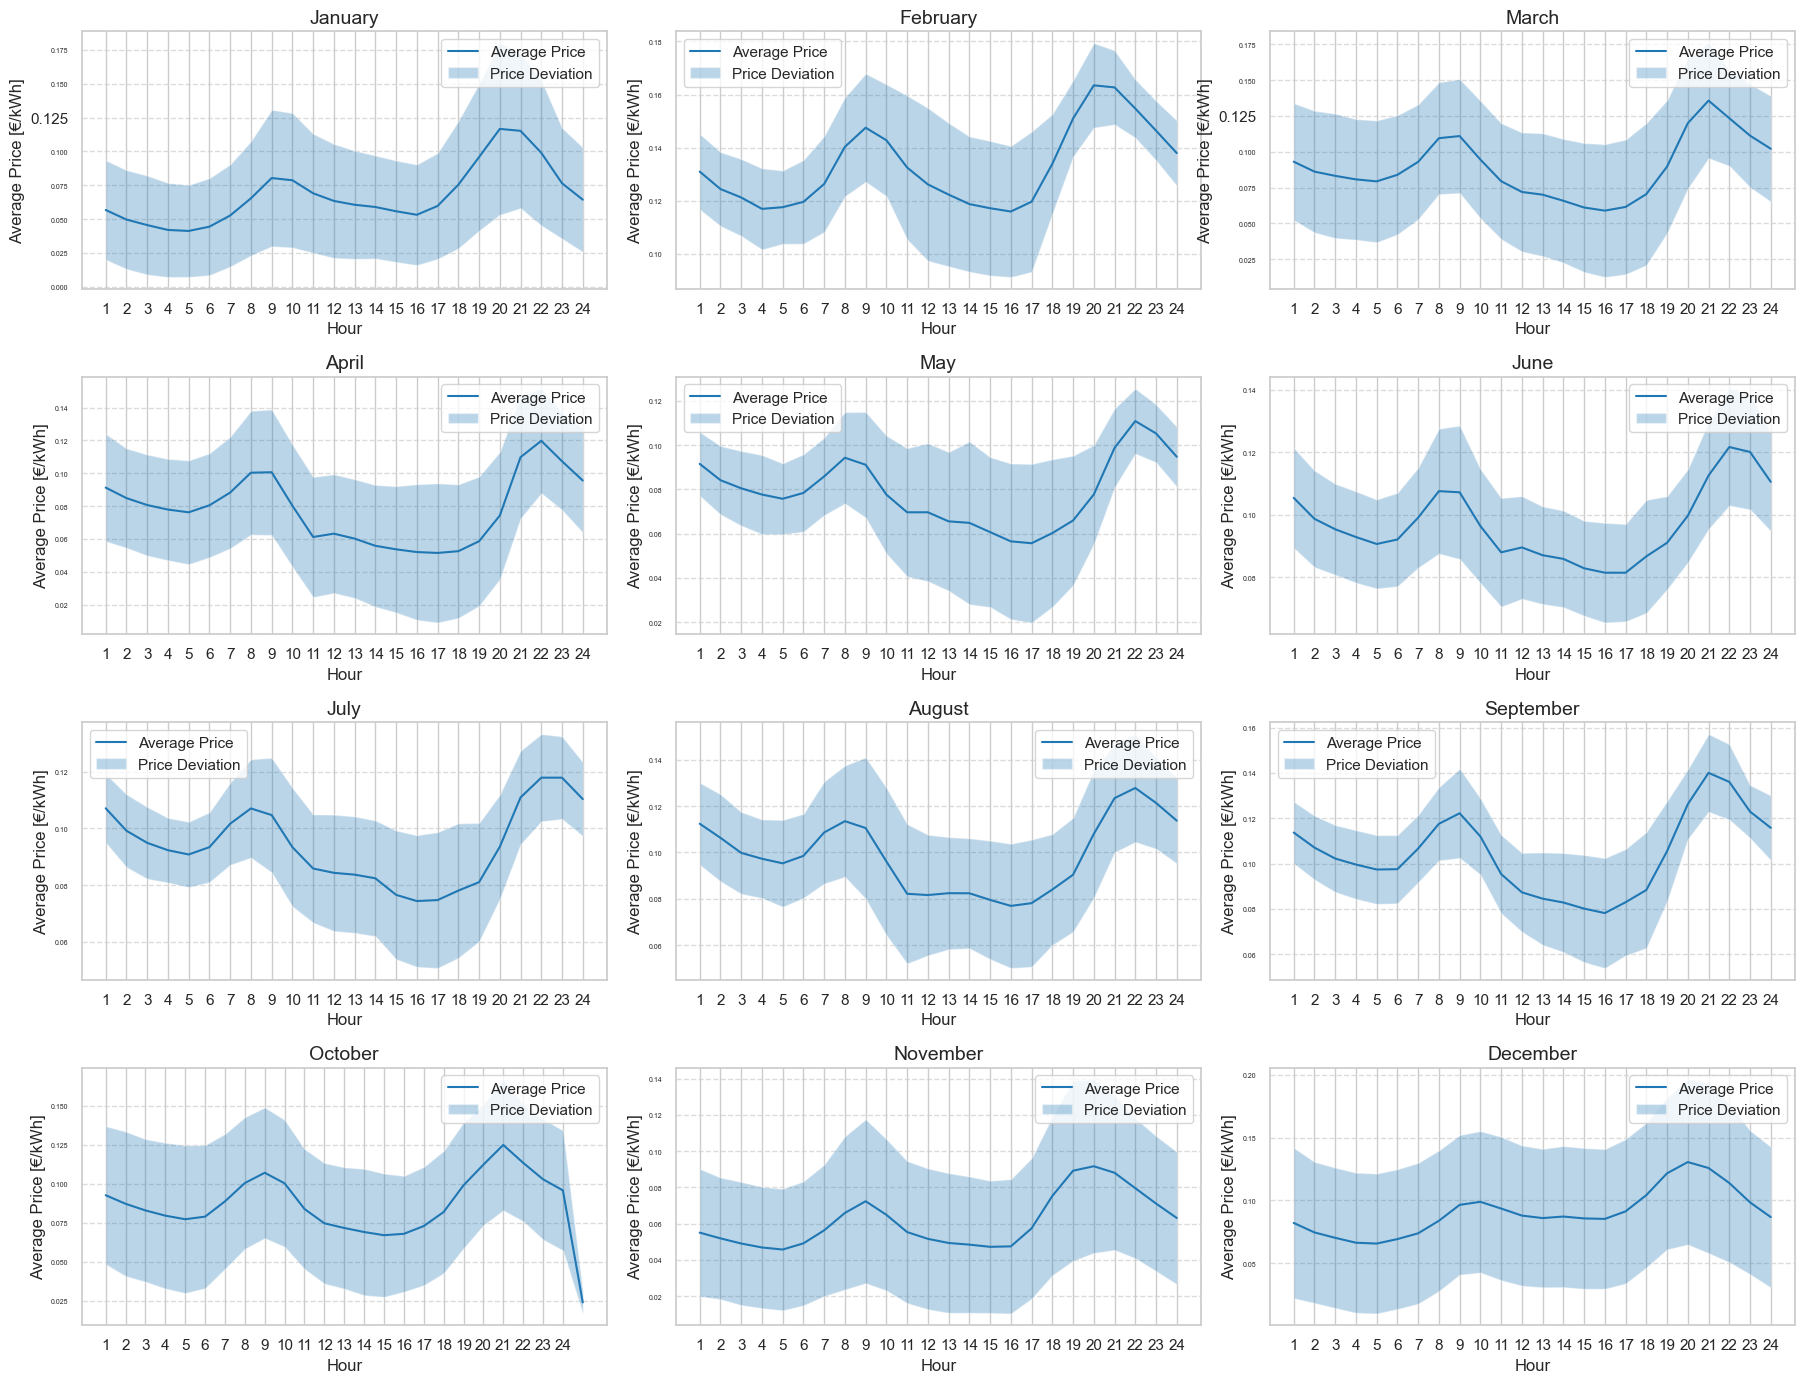

In [11]:
# Set seaborn style and choose a broader color palette
sns.set(style="whitegrid", palette="tab10")

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'MonthName' to categorical with the specified order
monthly_stats['MonthName'] = pd.Categorical(monthly_stats['MonthName'], categories=month_order, ordered=True)

# Combine the 12 plots into one
plt.figure(figsize=(18, 14))

for i, (month, data) in enumerate(monthly_stats.groupby('MonthName')):
    plt.subplot(4, 3, i+1)
    
    sns.lineplot(x='Hora', y='mean', data=data, label='Average Price', errorbar=None)
    plt.fill_between(data['Hora'], data['mean'] - data['std'], data['mean'] + data['std'], alpha=0.3, label='Price Deviation')
    
    plt.title(f'{month}', fontsize=14)
    plt.xlabel('Hour', fontsize=12)
    plt.ylabel('Average Price [€/kWh]', fontsize=12)
    plt.xticks(range(1, 25))  # Set x-axis ticks from 1 to 24
    plt.yticks(fontsize=5)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

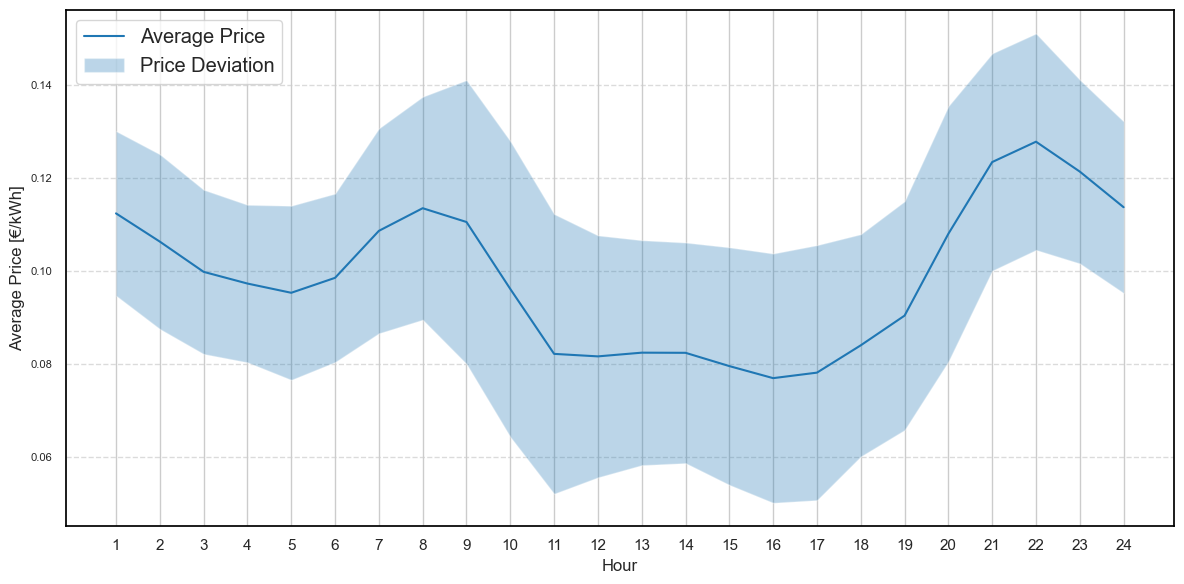

In [6]:
# Set seaborn style and choose a broader color palette
sns.set(style="whitegrid", palette="tab10")

# Print just one month, for example, 'August'
selected_month = 'August'
selected_data = monthly_stats[monthly_stats['MonthName'] == selected_month]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hora', y='mean', data=selected_data, label='Average Price', errorbar=None)
plt.fill_between(selected_data['Hora'], selected_data['mean'] - selected_data['std'], selected_data['mean'] + selected_data['std'], alpha=0.3, label='Price Deviation')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Price [€/kWh]', fontsize=12)
plt.yticks(fontsize=8)
plt.legend(fontsize='large', title_fontsize='x-large',loc='upper left')

# Set the frame (border) of the plot to be a black line
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')

# Set x-axis ticks and labels
plt.xticks(range(1, 25), labels=[str(i) for i in range(1, 25)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
excel_stats_file_path = '/Users/natomanzolli/Documents/PhD/Artigos/Journals/Electric bus battery performance - Exploring ageing mechanisms using a cycle semi-empirical degradation model/Data/energy_prices_per_month.xlsx'

with pd.ExcelWriter(excel_stats_file_path, engine='xlsxwriter') as writer:
    for month, data in monthly_stats.groupby('MonthName'):
        data.to_excel(writer, sheet_name=month, index=False)